In [18]:
%matplotlib inline
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from scipy.optimize import minimize

In [19]:
def random_numbers(input_data, k):
    indexes = set()
    while len(set(indexes)) != k:
        indexes.add(random.randint(0, len(input_data) - 1))
    return input_data[list(indexes)]

In [20]:
data = np.genfromtxt('lab1.csv', delimiter=',')
print(st.mean(data))
print(st.stdev(data))

60.04635761589404
6.013647544430045


In [21]:
def MME(input_data):
    mu = st.mean(input_data)
    sigma = st.stdev(input_data)
    return mu, sigma

In [22]:
test_data = random_numbers(data,150)

In [23]:
mu, sigma = MME(test_data)
print(mu,sigma)

59.913333333333334 5.637764165648652


In [24]:
def lik(parameters):
    mu    = parameters[0]
    sigma = parameters[1]    
    n     = len(x)  
#     L     = n/2.0 * np.log(2 * np.pi) + n/2.0 * math.log(sigma**2 ) + 1/(2*sigma**2) * sum([(x_ - mu)**2 for x_ in x ])
    L = (n/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2)) + 1 / (2 * sigma ** 2) * sum([(x_ - mu)**2 for x_ in x ])
    return L

def MLE(input_data):
    global x
    x = input_data

    lik_model = minimize(lik, np.array([5,5]), method='SLSQP')

    mu    = lik_model['x'][0]
    sigma = lik_model['x'][1]
    return mu, sigma

   

In [25]:
mu, sigma = MLE(test_data)
print(mu,sigma)

59.91334466579388 5.6189177914295705


In [26]:
def show_all_data_frame():
    pd.set_option('display.max_rows', 1000, 'display.max_columns', None)

def show_default_data_frame():
    pd.set_option('display.max_rows', 10, 'display.max_columns', None)

In [27]:
def load_data(path):
    return pd.read_csv(path, delimiter=';',encoding='cp1252')

### Завантаження даних у dataframe та їх перегляд 

In [28]:
data_frame = load_data('Clear_data.csv')
show_all_data_frame()
data_frame

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,3.465603e+07,9.809225e+03,652860.0
1,Albania,Europe & Central Asia,4124.982390,2.876101e+06,5.716853e+03,28750.0
2,Algeria,Middle East & North Africa,3916.881571,4.060605e+07,1.454002e+05,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,5.559900e+04,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,7.728100e+04,4.620420e+02,470.0
5,Angola,Sub-Saharan Africa,3308.700233,2.881346e+07,3.476316e+04,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,1.009630e+05,5.317150e+02,440.0
7,Argentina,Latin America & Caribbean,12440.320980,4.384743e+07,2.040245e+05,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2.924816e+06,5.529836e+03,29740.0
9,Aruba,Latin America & Caribbean,NaN,1.048220e+05,8.727460e+02,180.0


### Перегляд інформації про дані

In [29]:
show_default_data_frame()
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


### Виправлення помилок в даних

In [30]:
values = {'GDP per capita': data_frame['GDP per capita'].mean(),
          'Populatiion': data_frame['Populatiion'].mean(),
          'CO2 emission': data_frame['CO2 emission'].mean(),
         }
data_frame.fillna(value=values, inplace=True)

data_frame.loc[(data_frame['GDP per capita'] < 0), 'GDP per capita'] *= -1
data_frame.loc[(data_frame['Populatiion'] < 0), 'Populatiion'] *= -1
data_frame.loc[(data_frame['CO2 emission'] < 0), 'CO2 emission'] *= -1
data_frame.loc[(data_frame['Area'] < 0), 'Area'] *= -1

show_all_data_frame()
data_frame

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,3.465603e+07,9.809225e+03,652860.0
1,Albania,Europe & Central Asia,4124.982390,2.876101e+06,5.716853e+03,28750.0
2,Algeria,Middle East & North Africa,3916.881571,4.060605e+07,1.454002e+05,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,5.559900e+04,1.651141e+05,200.0
4,Andorra,Europe & Central Asia,36988.622030,7.728100e+04,4.620420e+02,470.0
5,Angola,Sub-Saharan Africa,3308.700233,2.881346e+07,3.476316e+04,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,1.009630e+05,5.317150e+02,440.0
7,Argentina,Latin America & Caribbean,12440.320980,4.384743e+07,2.040245e+05,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2.924816e+06,5.529836e+03,29740.0
9,Aruba,Latin America & Caribbean,13374.833168,1.048220e+05,8.727460e+02,180.0


### Діаграми розмаху та гістограми

#### Для 'GDP per capita'


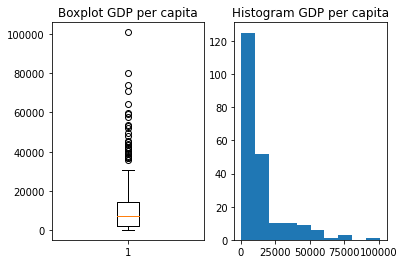

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(data_frame['GDP per capita'])
ax1.set_title('Boxplot GDP per capita')
ax2.hist(data_frame['GDP per capita'])
ax2.set_title('Histogram GDP per capita')

plt.show()

#### Для 'Population'


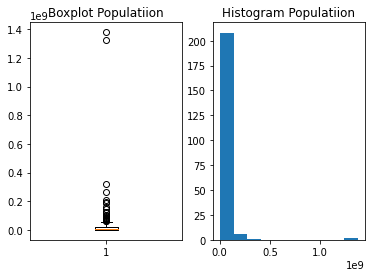

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(data_frame['Populatiion'])
ax1.set_title('Boxplot Populatiion')
ax2.hist(data_frame['Populatiion'])
ax2.set_title('Histogram Populatiion')
plt.show()

#### Для 'CO2 emission'

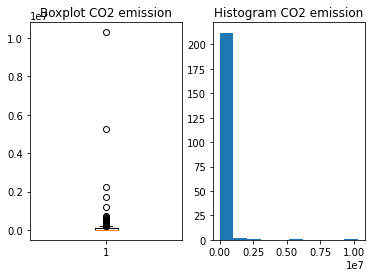

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(data_frame['CO2 emission'])
ax1.set_title('Boxplot CO2 emission')
ax2.hist(data_frame['CO2 emission'])
ax2.set_title('Histogram CO2 emission')
plt.show()

#### Для 'Area'

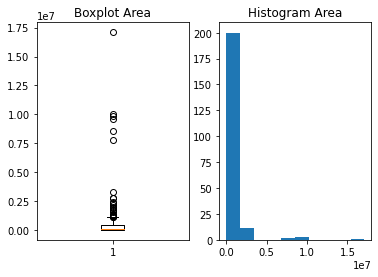

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(data_frame['Area'].astype(float))
ax1.set_title('Boxplot Area')
ax2.hist(data_frame['Area'])
ax2.set_title('Histogram Area')
plt.show()

### Додавання стовбчика з щільністю населення


In [35]:
data_frame['Population density'] = data_frame['Populatiion'] / data_frame['Area']
data_frame

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,3.465603e+07,9.809225e+03,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2.876101e+06,5.716853e+03,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,4.060605e+07,1.454002e+05,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,5.559900e+04,1.651141e+05,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,7.728100e+04,4.620420e+02,470.0,164.427660
5,Angola,Sub-Saharan Africa,3308.700233,2.881346e+07,3.476316e+04,1246700.0,23.111786
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,1.009630e+05,5.317150e+02,440.0,229.461364
7,Argentina,Latin America & Caribbean,12440.320980,4.384743e+07,2.040245e+05,2780400.0,15.770188
8,Armenia,Europe & Central Asia,3614.688357,2.924816e+06,5.529836e+03,29740.0,98.346200
9,Aruba,Latin America & Caribbean,13374.833168,1.048220e+05,8.727460e+02,180.0,582.344444


### Відповіді на запитання:


#### №1 Чи є пропущені дані?
#### Так, є - замінив середнім

In [36]:
data_frame.head(10)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160000,1246700.0,23.111786
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963.0,531.715000,440.0,229.461364
7,Argentina,Latin America & Caribbean,12440.320980,43847430.0,204024.546000,2780400.0,15.770188
8,Armenia,Europe & Central Asia,3614.688357,2924816.0,5529.836000,29740.0,98.346200
9,Aruba,Latin America & Caribbean,13374.833168,104822.0,872.746000,180.0,582.344444


#### №2 Яка країна має нальбійший ВВП на душу населення? Яка країна має найменшу площу?
####

In [37]:
gdp_max_ind = np.argmax(data_frame['GDP per capita'])
area_min_ind = np.argmin(data_frame['Area'])
print('Країна з максимальним ВВП на душу населення: '+ data_frame['Country Name'][gdp_max_ind])
print('Країна з мінімальною площею: ' + data_frame['Country Name'][area_min_ind])

Країна з максимальним ВВП на душу населення: Luxembourg
Країна з мінімальною площею: Monaco


#### В якому регіоні середня площа країни найбільша?

In [38]:
region = data_frame.groupby(by='Region').mean()['Area'].idxmax()

print(region)

North America


#### Населення у світі і у Європі


In [39]:
max_population_in_the_world_indx = data_frame['Populatiion'].idxmax()
print('Країна з найбільшим населенням: ' + data_frame.loc[max_population_in_the_world_indx]['Country Name'])

max_population_in_Europe_indx = data_frame.loc[data_frame['Region'] == 'Europe & Central Asia','Populatiion'].idxmax()
print('Країна з найбільшим населенням в Європі: ' + data_frame.loc[max_population_in_Europe_indx]['Country Name'])

Країна з найбільшим населенням: China
Країна з найбільшим населенням в Європі: Russian Federation


#### Чи співпадає в якомусь регіоні середнє та медіана ВВП?

In [46]:
mean_GDP = data_frame.groupby(by='Region').mean()['GDP per capita']
median_GDP = data_frame.groupby(by='Region').median()['GDP per capita']
print(mean_GDP)
print(median_GDP)

print(f'Перетин - {pd.merge(mean_GDP,median_GDP)}')

Region
East Asia & Pacific           15124.489231
Europe & Central Asia         22733.595488
Latin America & Caribbean     10468.495458
Middle East & North Africa    15449.053926
North America                 37732.095786
South Asia                     2795.213935
Sub-Saharan Africa             2874.243005
Name: GDP per capita, dtype: float64
Region
East Asia & Pacific            5910.620932
Europe & Central Asia         13374.833168
Latin America & Caribbean     10833.201075
Middle East & North Africa    13374.833168
North America                 42183.295100
South Asia                     1576.608412
Sub-Saharan Africa             1034.390361
Name: GDP per capita, dtype: float64
Перетин - Empty DataFrame
Columns: [GDP per capita]
Index: []


#### Вивести топ 5 країн та 5 останніх країн по ВВП та кількості СО2 на душу населення.


In [41]:
data_frame.sort_values(by='GDP per capita', ascending=False).head(5)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
115,Luxembourg,Europe & Central Asia,100738.68420,582972.0,9658.878,2590.0,225.085714
188,Switzerland,Europe & Central Asia,79887.51824,8372098.0,35305.876,41290.0,202.763333
116,Macao SAR. China,East Asia & Pacific,74017.18471,612167.0,1283.450,30.3,20203.531353
146,Norway,Europe & Central Asia,70868.12250,5232929.0,47626.996,385178.0,13.585742
92,Ireland,Europe & Central Asia,64175.43824,4773095.0,34066.430,70280.0,67.915410


In [42]:
data_frame.sort_values(by='GDP per capita', ascending=True).head(5)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
31,Burundi,Sub-Saharan Africa,285.727442,10524117.0,440.040,27830.0,378.157276
119,Malawi,Sub-Saharan Africa,300.307665,18091575.0,1276.116,118480.0,152.697291
134,Mozambique,Sub-Saharan Africa,382.069330,28829476.0,8426.766,799380.0,36.064795
37,Central African Republic,Sub-Saharan Africa,382.213174,4594621.0,300.694,622980.0,7.375230
118,Madagascar,Sub-Saharan Africa,401.742270,24894551.0,3076.613,587295.0,42.388495


In [43]:
data_frame.sort_values(by='CO2 emission', ascending=False).head(5)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
41,China,East Asia & Pacific,8123.180873,1.378665e+09,1.029193e+07,9562911.0,144.167921
206,United States,North America,57638.159090,3.231275e+08,5.254279e+06,9831510.0,32.866519
88,India,South Asia,1709.591808,1.324171e+09,2.238377e+06,3287259.0,402.819295
160,Russian Federation,Europe & Central Asia,8748.368853,1.443424e+08,1.705346e+06,17098250.0,8.441940
97,Japan,East Asia & Pacific,38900.569310,1.269945e+08,1.214048e+06,377962.0,335.998092


In [44]:
data_frame.sort_values(by='CO2 emission', ascending=True).head(5)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
201,Tuvalu,East Asia & Pacific,3083.615251,11097.0,11.001,30.0,369.900000
113,Liechtenstein,Europe & Central Asia,13374.833168,37666.0,44.004,160.0,235.412500
137,Nauru,East Asia & Pacific,7821.298918,13049.0,47.671,20.0,652.450000
101,Kiribati,East Asia & Pacific,1587.057869,114395.0,62.339,810.0,141.228395
124,Marshall Islands,East Asia & Pacific,3665.207477,53066.0,102.676,180.0,294.811111
